In [1]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
df = pd.read_excel('foil.xlsx')

In [3]:
x = df['x']
y = df['y']

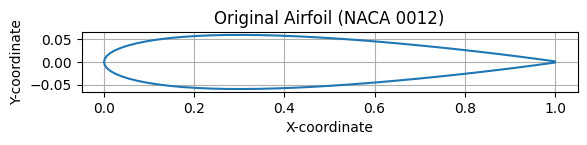

In [4]:
plt.plot(x,y)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Airfoil (NACA 0012)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()

In [5]:
x = df['x'].values
y = df['y'].values

In [6]:
x = x[np.logical_not(np.isnan(x))]
y = y[np.logical_not(np.isnan(y))]

In [7]:
def hicks_henne(x_coord, y_coord , n, a, w, xM):
    y_deformed = np.array(y_coord)
    for i in range(n):
        ai = a[i]
        xMi = xM[i]
        wi = w[i]
        m = np.log(0.5)/np.log(xMi)
        f = np.sin(np.pi * np.array(x_coord) ** m ) ** wi
        y_deformed += ai * f
        
        x_1 = []
        for j in range(0,1001):
            x_1.append(j/1000)
        f_b = np.sin(np.pi * np.array(x_1) ** m ) ** wi
        plt.xlabel('X-coordinate')
        plt.ylabel('Bump function')
        plt.plot(x_1, f_b)
        plt.title('Hicks-Henn Bump Function')

    return y_deformed   

In [8]:
#inputs
n = 15
a_up =  [0.0001, 0.002, 0.002, 0.004, 0.002, 0.001, 0.005, 0.005, 0.003, -0.002, 0.002, 0.001, 0.001, 0.001, 0.0001]
a_low = [0.0001, -0.01, 0.02, -0.01,  -0.02, -0.002, 0.005, 0.005, 0.003, -0.002, 0.002, 0.001, 0.001, 0.001, 0.0001]
w = np.full(15,2) 

xM = np.array([])
for i in range(1,n+1):
    x_m =  0.5 * (1 - math.sin(math.pi * 2 * i / n))
    xM = np.append(xM,x_m)
xM = np.sort(xM)

In [9]:
xM

array([0.00273905, 0.02447174, 0.0669873 , 0.12842759, 0.20610737,
       0.29663168, 0.39604415, 0.5       , 0.60395585, 0.70336832,
       0.79389263, 0.87157241, 0.9330127 , 0.97552826, 0.99726095])

In [10]:
def split_list(arr):
    half = len(arr)//2
    return arr[:half+1], arr[half+1:]

x_up, x_low = split_list(x)
y_up, y_low = split_list(y)

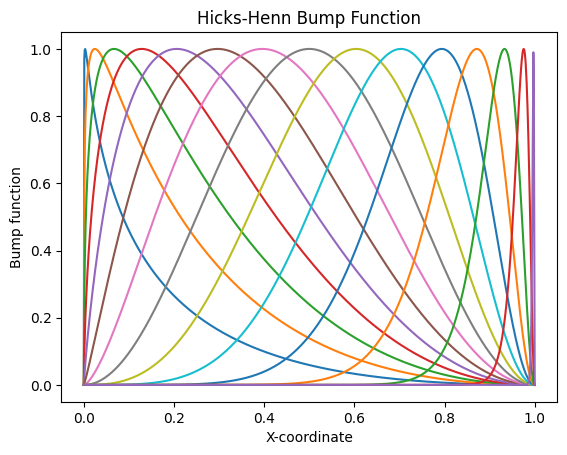

In [11]:
y_mod_up = hicks_henne(x_up, y_up, n, a_up, w, xM)

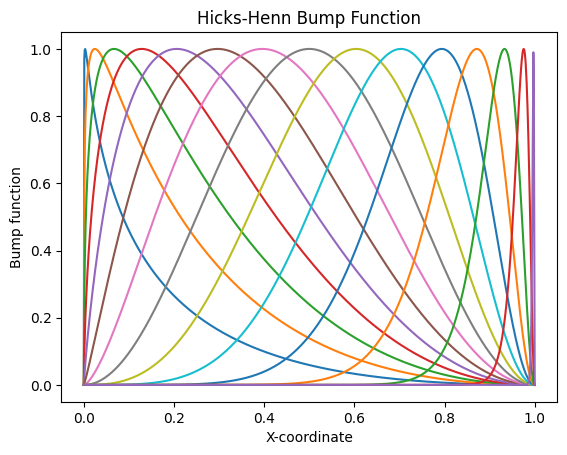

In [12]:
y_mod_low = hicks_henne(x_low, y_low, n, a_low, w, xM)

In [13]:
y_mod = np.concatenate((y_mod_up, y_mod_low))

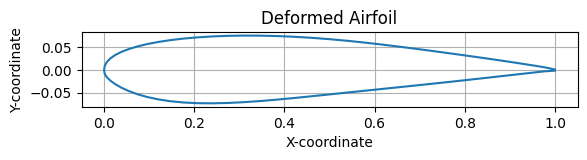

In [14]:
plt.plot(x,y_mod)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Deformed Airfoil')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()

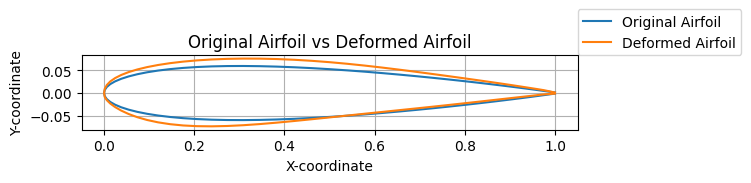

In [15]:
plt.plot(x, y, label = "Original Airfoil")
plt.plot(x, y_mod, label = "Deformed Airfoil")
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Airfoil vs Deformed Airfoil')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend(loc=(1,1))
plt.grid()


In [16]:
df1 = pd.DataFrame({'x': x, 'y_modified': y_mod} )

In [17]:
df1.head()

,x,y_modified
0,1.000000,0.001260
1,0.998459,0.001569
2,0.993844,0.002440
3,0.986185,0.004151
4,0.975528,0.006319


In [18]:
# path = "C:/Users/user/OneDrive - BUET/Desktop/Deform/Hicks-Henne deformation of 2d airfoil/Deformed foil/Deformed_airfoil(5).xlsx" 
# with pd.ExcelWriter(path, mode = "a", engine = "openpyxl", if_sheet_exists = "replace") as writer:
#     df1.to_excel(writer, index = False)